In [1]:
from IPython.display import Image
import numpy as np

![](0_MZYPbIwBn5SOEpG7.png)

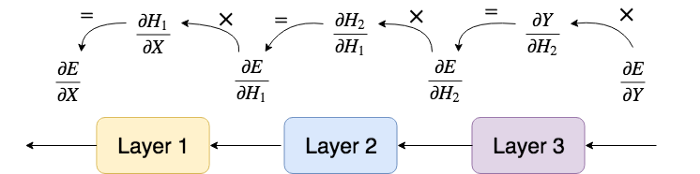

In [2]:
Image('1_0QPRST83oBicKPE_R4biJA.png')

In [3]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward_propagation(self, input):
        raise NotImplementedError
    
    def backward_propagation(self, output_err, learning_rate):
        raise NotImplementedError

In [4]:
class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5
        
    def forward_propagation(self, input):
        self.input = input
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        
#         print(output_error, self.input)
        
        
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error
        

In [5]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_derivative):
        self.activation = activation
        self.activation_derivative = activation_derivative
        
    def forward_propagation(self, input):
        self.input = input
        self.output = self.activation(self.input)
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_derivative(self.input) * output_error

In [6]:
def tanh(x):
    return np.tanh(x)

In [20]:
def tanh_derivative(x):
    return 1-np.tanh(x)**2

In [21]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

In [22]:
def mse_derivative(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [23]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_derivative = None
        
    def add_layer(self, layer):
        self.layers.append(layer)
    
    def set_loss(self, loss, loss_derivative):
        self.loss = loss
        self.loss_derivative = loss_derivative
        
    def predict(self, input):
        amount_of_samples = len(input)
        result = []
        
        for sample in input:
            output = sample
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)        
        return result
    
    def fit(self, X, y, epochs, learning_rate):
        amount_of_samples = len(X)
        
        for epoch in range(epochs):
            err = 0
            for sample_number in range(amount_of_samples):
                output = X[sample_number]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                    
                err += self.loss(y[sample_number], output)
                
                back_propagation_error = self.loss_derivative(y[sample_number], output)
#                 print(back_propagation_error.shape)
                
                for layer in reversed(self.layers):
#                     print(back_propagation_error.shape)
                    back_propagation_error = layer.backward_propagation(back_propagation_error, learning_rate)
                
            err /= amount_of_samples
            print(f'e {epoch+1}/{epochs} err={err}')

In [24]:
xor_x = np.array([
    [[0, 0]],
    [[0, 1]],
    [[1, 0]],
    [[1, 1]]
])

xor_y = np.array([
    [[0]],
    [[1]],
    [[1]],
    [[0]]
])

In [25]:
xor_x.shape

(4, 1, 2)

In [26]:
xor_y.shape

(4, 1, 1)

In [27]:
xor_net = Network()
xor_net.add_layer(FCLayer(2, 3))
xor_net.add_layer(ActivationLayer(tanh, tanh_derivative))
xor_net.add_layer(FCLayer(3, 1))
xor_net.add_layer(ActivationLayer(tanh, tanh_derivative))

In [28]:
xor_net.set_loss(mse, mse_derivative)

In [ ]:
xor_net.fit(xor_x, xor_y, epochs=1000, learning_rate=0.1)

In [30]:
xor_net.predict(xor_x)

[array([[0.00104386]]),
 array([[0.97890254]]),
 array([[0.97877778]]),
 array([[-0.00035319]])]

In [84]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [85]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [86]:
x_train.dtype

dtype('uint8')

In [87]:
Xs = [x_train, x_test]

for i in range(len(Xs)):
    Xs[i] = np.reshape(Xs[i], (Xs[i].shape[0], 1, 28*28))
    Xs[i] = Xs[i].astype('float32')
    x_train / 255

x_train, x_test = Xs
    
[x.shape for x in Xs]

[(60000, 1, 784), (10000, 1, 784)]

In [88]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
(y_train.shape, y_test.shape)

((60000, 10), (10000, 10))

In [107]:
def display_images(x, y):
    # first 16 used
    plt.rcParams['figure.figsize'] = [16, 16]

    figs, axiss = plt.subplots(4, 4)
    
    for i in range(4):
        for j in range(4):
            index = i*4+j
            image = np.reshape(x[index], (28, 28))
            axiss[i, j].imshow(image)
            axiss[i,j].set_title(np.argmax(y[index]))
    plt.show()

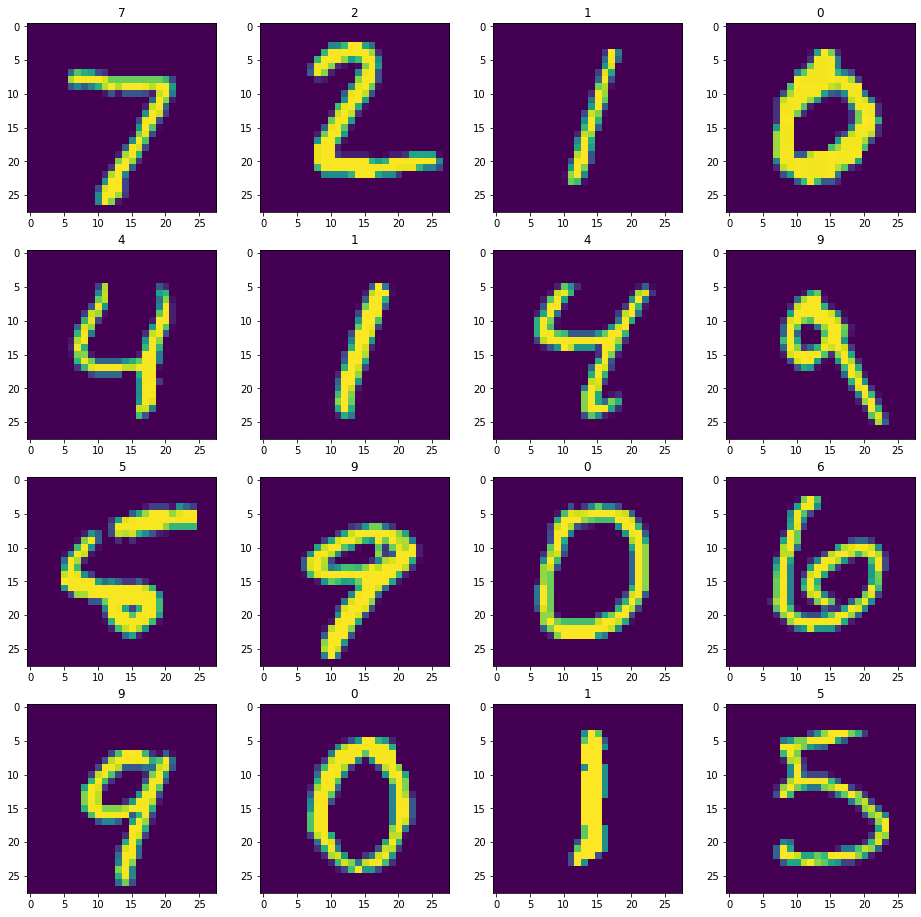

In [108]:
display_images(x_test, y_test)

In [148]:
mnist_net = Network()
mnist_net.add_layer(FCLayer(28*28, 100))
mnist_net.add_layer(ActivationLayer(tanh, tanh_derivative))
mnist_net.add_layer(FCLayer(100, 50))
mnist_net.add_layer(ActivationLayer(tanh, tanh_derivative))
mnist_net.add_layer(FCLayer(50, 10))
mnist_net.add_layer(ActivationLayer(tanh, tanh_derivative))

In [149]:
mnist_net.set_loss(mse, mse_derivative)

In [160]:
mnist_net.fit(x_train[2000:3000], y_train[2000:3000], epochs=10000, learning_rate=0.1)

e 1/10000 err=0.10018226673029203
e 2/10000 err=0.10528469644801867
e 3/10000 err=0.1027318703405484
e 4/10000 err=0.09557455936157343
e 5/10000 err=0.09367740632695111
e 6/10000 err=0.09265435596493553
e 7/10000 err=0.09255333463263542
e 8/10000 err=0.09227999230158446
e 9/10000 err=0.09201921949647036
e 10/10000 err=0.09186444633266042
e 11/10000 err=0.09175488793877347
e 12/10000 err=0.09166769974122162
e 13/10000 err=0.09159539860434679
e 14/10000 err=0.0915334216280549
e 15/10000 err=0.09147893391637664
e 16/10000 err=0.09142972300449563
e 17/10000 err=0.09268282565496296
e 18/10000 err=0.09314215935105255
e 19/10000 err=0.09188874289727997
e 20/10000 err=0.0917290451697203
e 21/10000 err=0.09166836102499845
e 22/10000 err=0.0916254481821806
e 23/10000 err=0.09159171004909579
e 24/10000 err=0.0915620541282125
e 25/10000 err=0.09153411357796508
e 26/10000 err=0.09150724466963212
e 27/10000 err=0.091481211249652
e 28/10000 err=0.09145585820772564
e 29/10000 err=0.09143105565152697
e

In [152]:
y_test_pred = mnist_net.predict(x_test)

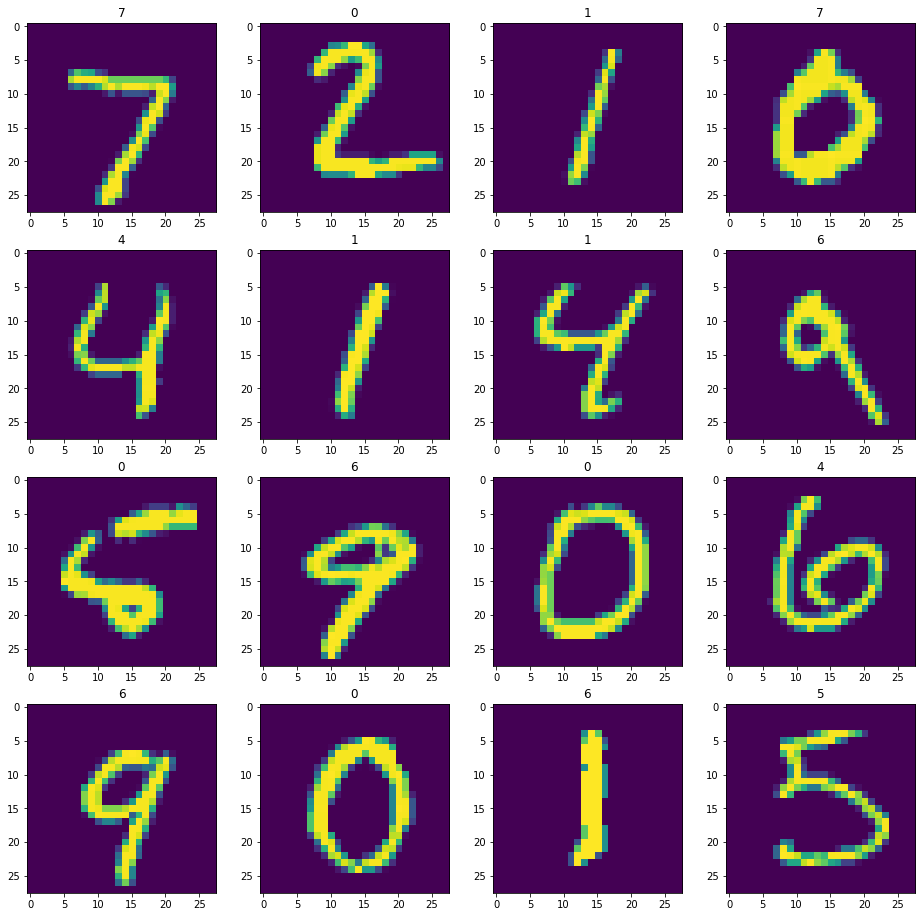

In [153]:
display_images(x_test, y_test_pred)